# Exploratory Data Analysis (EDA)

The purpose of EDA here is to identify high correlated weather parameters and select a representative parameter so that the number of weather parameters to be used as the VAE input will be reduced. 

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

from common import common

In [2]:
input_dir = common.data_path("input_data")

In [3]:
weather_parameters = [
  "CAPE_most_unstable_below_500hPa",
  "CAPE_surface",
  "cloud_amount_below_1000ft_ASL",
  "cloud_amount_of_high_cloud",
  "cloud_amount_of_low_cloud",
  "cloud_amount_of_medium_cloud",
  "cloud_amount_of_total_cloud",
  "fog_fraction_at_screen_level",
  "hail_fall_rate",
  "height_AGL_at_cloud_base_where_cloud_cover_2p5_oktas",
  "height_AGL_at_freezing_level",
  "height_AGL_at_wet_bulb_freezing_level",
  "landsea_mask",
  "precipitation_rate",
  "pressure_at_mean_sea_level",
  "pressure_at_surface",
  "radiation_flux_in_longwave_downward_at_surface",
  "radiation_flux_in_shortwave_diffuse_downward_at_surface",
  "radiation_flux_in_shortwave_direct_downward_at_surface",
  "radiation_flux_in_shortwave_total_downward_at_surface",
  "radiation_flux_in_uv_downward_at_surface",
  "rainfall_rate",
  "relative_humidity_at_screen_level",
  "sensible_heat_flux_at_surface",
  "snow_depth_water_equivalent",
  "snowfall_rate",
  "temperature_at_screen_level",
  "temperature_at_surface",
  "temperature_of_dew_point_at_screen_level",
  "visibility_at_screen_level",
  "wind_direction_at_10m",
  "wind_gust_at_10m",
  "wind_speed_at_10m"
]

accumulate_weather_parameters = [
  "hail_fall_accumulation-PT01H",
  "lightning_flash_accumulation-PT01H",
  "precipitation_accumulation-PT01H",
  "rainfall_accumulation-PT01H",
  "snowfall_accumulation-PT01H",
  "temperature_at_screen_level_max-PT01H",
  "temperature_at_screen_level_min-PT01H",
  "wind_gust_at_10m_max-PT01H",
]

height = 8
width = 13


In [4]:
df = pd.read_parquet(f"{input_dir}/asdi_data.parquet")

In [5]:
df

,date_time,y,x,CAPE_most_unstable_below_500hPa,CAPE_surface,cloud_amount_below_1000ft_ASL,cloud_amount_of_high_cloud,cloud_amount_of_low_cloud,cloud_amount_of_medium_cloud,cloud_amount_of_total_cloud,...,wind_gust_at_10m,wind_speed_at_10m,hail_fall_accumulation-PT01H,lightning_flash_accumulation-PT01H,precipitation_accumulation-PT01H,rainfall_accumulation-PT01H,snowfall_accumulation-PT01H,temperature_at_screen_level_max-PT01H,temperature_at_screen_level_min-PT01H,wind_gust_at_10m_max-PT01H
0,2023010100,0,0,3.5,2.0,0.718750,1.000000,1.000000,1.0,1.000000,...,10.8750,5.6875,0.0,0.0,0.000855,0.000855,0.0,275.59375,275.23438,10.9375
1,2023010100,0,1,2.5,2.0,0.734375,1.000000,1.000000,1.0,1.000000,...,10.8125,5.6875,0.0,0.0,0.000931,0.000931,0.0,275.61720,275.24220,10.6875
2,2023010100,0,2,2.0,2.0,0.757812,1.000000,1.000000,1.0,1.000000,...,10.5000,5.5000,0.0,0.0,0.001070,0.001070,0.0,275.58594,275.22656,10.3750
3,2023010100,0,3,2.0,2.0,0.828125,1.000000,1.000000,1.0,1.000000,...,10.5625,5.5000,0.0,0.0,0.001306,0.001306,0.0,275.33594,275.00780,10.5000
4,2023010100,0,4,1.0,1.0,NaN,1.000000,1.000000,1.0,1.000000,...,10.9375,5.8125,0.0,0.0,0.001493,0.001493,0.0,274.84375,274.53906,10.8750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909787,2023123123,7,8,0.0,0.0,0.015625,0.031250,0.796875,0.0,0.921875,...,6.0000,4.5625,0.0,0.0,0.000000,0.000000,0.0,278.77344,278.22656,6.0000
909788,2023123123,7,9,0.0,0.0,0.031250,0.015625,0.773438,0.0,0.859375,...,6.1250,4.6875,0.0,0.0,0.000000,0.000000,0.0,278.88280,278.28906,6.2500
909789,2023123123,7,10,0.0,0.0,0.046875,0.007812,0.781250,0.0,0.843750,...,6.1250,4.6875,0.0,0.0,0.000000,0.000000,0.0,278.99220,278.41406,6.2500
909790,2023123123,7,11,0.0,0.0,0.070312,0.000000,0.921875,0.0,0.960938,...,6.1250,4.6250,0.0,0.0,0.000000,0.000000,0.0,279.10938,278.71875,6.3125


In [6]:
# Check which column contains nan data.
# Result: cloud_amount_below_1000ft_ASL and height_AGL_at_cloud_base_where_cloud_cover_2p5_oktas contain nan.
df.isna().any()

date_time                                                  False
y                                                          False
x                                                          False
CAPE_most_unstable_below_500hPa                            False
CAPE_surface                                               False
cloud_amount_below_1000ft_ASL                               True
cloud_amount_of_high_cloud                                 False
cloud_amount_of_low_cloud                                  False
cloud_amount_of_medium_cloud                               False
cloud_amount_of_total_cloud                                False
fog_fraction_at_screen_level                               False
hail_fall_rate                                             False
height_AGL_at_cloud_base_where_cloud_cover_2p5_oktas        True
height_AGL_at_freezing_level                               False
height_AGL_at_wet_bulb_freezing_level                      False
landsea_mask             

In [7]:
df.describe()

,date_time,y,x,CAPE_most_unstable_below_500hPa,CAPE_surface,cloud_amount_below_1000ft_ASL,cloud_amount_of_high_cloud,cloud_amount_of_low_cloud,cloud_amount_of_medium_cloud,cloud_amount_of_total_cloud,...,wind_gust_at_10m,wind_speed_at_10m,hail_fall_accumulation-PT01H,lightning_flash_accumulation-PT01H,precipitation_accumulation-PT01H,rainfall_accumulation-PT01H,snowfall_accumulation-PT01H,temperature_at_screen_level_max-PT01H,temperature_at_screen_level_min-PT01H,wind_gust_at_10m_max-PT01H
count,9.097920e+05,909792.000000,909792.000000,909792.000000,909792.000000,883548.000000,909792.000000,909792.000000,909792.000000,909792.000000,...,909792.000000,909792.000000,9.097920e+05,9.097920e+05,909792.000000,909792.000000,9.097920e+05,909792.000000,909792.000000,909792.000000
mean,2.023067e+09,3.500000,6.000000,32.113021,24.251416,0.052471,0.375879,0.550984,0.429853,0.758324,...,8.225238,4.465139,7.240840e-07,1.880678e-11,0.000102,0.000101,8.435364e-07,283.227127,282.701911,9.415285
std,3.449152e+04,2.291289,3.741659,96.231630,82.301249,0.143934,0.408393,0.390796,0.414146,0.341096,...,4.495572,2.550141,9.347004e-06,2.729895e-09,0.000437,0.000434,2.733091e-05,5.093750,5.023529,4.722577
min,2.023010e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.125000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,261.382800,260.148440,0.750000
25%,2.023040e+09,1.750000,3.000000,0.000000,0.000000,0.000000,0.000000,0.132812,0.000000,0.601562,...,4.812500,2.562500,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,279.593750,279.171880,5.875000
50%,2.023070e+09,3.500000,6.000000,3.500000,0.500000,0.000000,0.156250,0.625000,0.328125,0.960938,...,7.562500,4.062500,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,283.039060,282.593750,8.687500
75%,2.023100e+09,5.250000,9.000000,20.500000,13.000000,0.015625,0.828125,0.960938,0.898438,1.000000,...,10.750000,5.875000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,287.085940,286.546880,12.062500
max,2.023123e+09,7.000000,12.000000,2202.500000,2202.500000,1.000000,1.000000,1.000000,1.000000,1.000000,...,32.437500,19.937500,8.230209e-04,4.889444e-07,0.017476,0.017476,2.371788e-03,300.703120,300.125000,32.687500


In [8]:
df.columns

Index(['date_time', 'y', 'x', 'CAPE_most_unstable_below_500hPa',
       'CAPE_surface', 'cloud_amount_below_1000ft_ASL',
       'cloud_amount_of_high_cloud', 'cloud_amount_of_low_cloud',
       'cloud_amount_of_medium_cloud', 'cloud_amount_of_total_cloud',
       'fog_fraction_at_screen_level', 'hail_fall_rate',
       'height_AGL_at_cloud_base_where_cloud_cover_2p5_oktas',
       'height_AGL_at_freezing_level', 'height_AGL_at_wet_bulb_freezing_level',
       'landsea_mask', 'precipitation_rate', 'pressure_at_mean_sea_level',
       'pressure_at_surface', 'radiation_flux_in_longwave_downward_at_surface',
       'radiation_flux_in_shortwave_diffuse_downward_at_surface',
       'radiation_flux_in_shortwave_direct_downward_at_surface',
       'radiation_flux_in_shortwave_total_downward_at_surface',
       'radiation_flux_in_uv_downward_at_surface', 'rainfall_rate',
       'relative_humidity_at_screen_level', 'sensible_heat_flux_at_surface',
       'snow_depth_water_equivalent', 'snowfall_

In [9]:
df6h = df.copy()
df6h['6h'] = (df6h['date_time'] % 100) // 6
df6h['day'] = (df6h['date_time'] // 100)
df6h = df6h.groupby(['day', '6h'], as_index=False).sum()

In [10]:
def draw_heatmap(data, annot=True):
  sns.heatmap(data.corr(), annot=annot, fmt=".2f", cmap="crest")

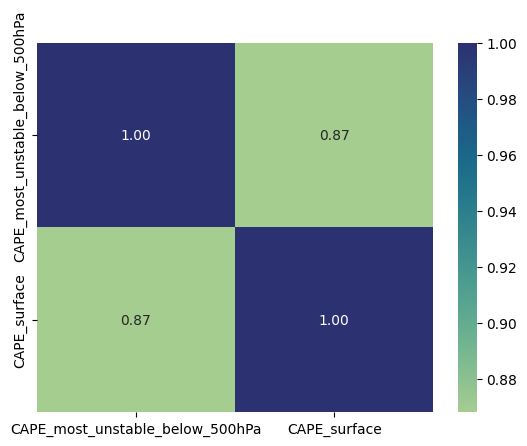

In [11]:
cape_parameters = [
  'CAPE_most_unstable_below_500hPa', 
  'CAPE_surface', 
  # "lightning_flash_accumulation-PT01H",
]
draw_heatmap(df[cape_parameters])
# No correlation between CAPE and lightning flash accumulation.
# Two CAPE parameters are correlated by 0.87, so one of them can be used as a representative parameter.

<Axes: ylabel='Count'>

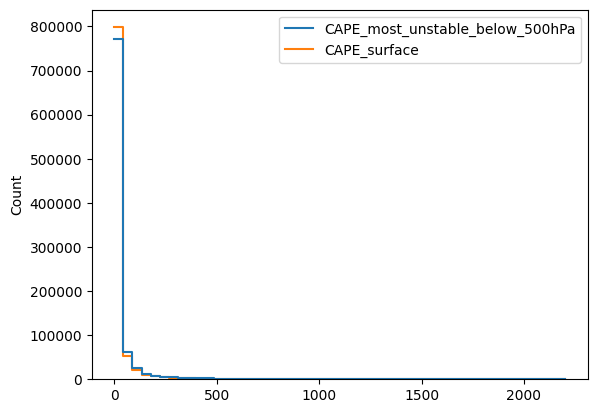

In [12]:
sns.histplot(df[cape_parameters], element="step", bins=50, fill=False)


<Axes: ylabel='Count'>

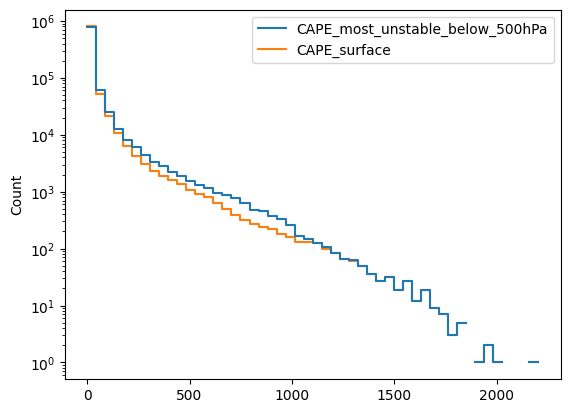

In [13]:
sns.histplot(df[cape_parameters], element="step", bins=50, fill=False, log_scale=[False, True])

<Axes: ylabel='Count'>

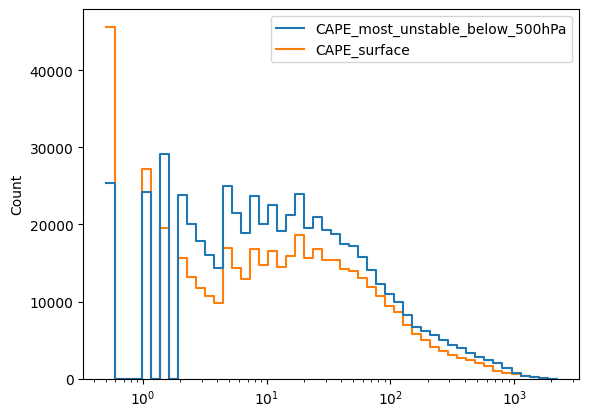

In [14]:
sns.histplot(df[cape_parameters], element="step", bins=50, fill=False, log_scale=[True, False])

In [15]:
df[cape_parameters].describe()

,CAPE_most_unstable_below_500hPa,CAPE_surface
count,909792.000000,909792.000000
mean,32.113021,24.251416
std,96.231630,82.301249
min,0.000000,0.000000
25%,0.000000,0.000000
50%,3.500000,0.500000
75%,20.500000,13.000000
max,2202.500000,2202.500000


In [16]:
df[df['CAPE_most_unstable_below_500hPa'] < 0.5]

,date_time,y,x,CAPE_most_unstable_below_500hPa,CAPE_surface,cloud_amount_below_1000ft_ASL,cloud_amount_of_high_cloud,cloud_amount_of_low_cloud,cloud_amount_of_medium_cloud,cloud_amount_of_total_cloud,...,wind_gust_at_10m,wind_speed_at_10m,hail_fall_accumulation-PT01H,lightning_flash_accumulation-PT01H,precipitation_accumulation-PT01H,rainfall_accumulation-PT01H,snowfall_accumulation-PT01H,temperature_at_screen_level_max-PT01H,temperature_at_screen_level_min-PT01H,wind_gust_at_10m_max-PT01H
35,2023010100,2,9,0.0,0.0,0.375000,1.000000,1.000000,1.0,1.000000,...,7.8750,4.1250,0.000011,0.0,0.001863,0.001851,0.0,276.45312,276.31250,7.9375
36,2023010100,2,10,0.0,0.0,0.328125,1.000000,1.000000,1.0,1.000000,...,6.8125,3.5625,0.000021,0.0,0.002055,0.002034,0.0,276.67188,276.49220,7.1875
37,2023010100,2,11,0.0,0.0,0.265625,1.000000,1.000000,1.0,1.000000,...,6.2500,3.2500,0.000043,0.0,0.002389,0.002346,0.0,276.95312,276.71875,7.3125
38,2023010100,2,12,0.0,0.0,0.257812,1.000000,1.000000,1.0,1.000000,...,6.4375,3.3750,0.000076,0.0,0.002551,0.002475,0.0,276.84375,276.62500,8.6250
48,2023010100,3,9,0.0,0.0,0.328125,1.000000,1.000000,1.0,1.000000,...,8.3750,4.5625,0.000008,0.0,0.001630,0.001622,0.0,276.75780,276.66406,9.5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909787,2023123123,7,8,0.0,0.0,0.015625,0.031250,0.796875,0.0,0.921875,...,6.0000,4.5625,0.000000,0.0,0.000000,0.000000,0.0,278.77344,278.22656,6.0000
909788,2023123123,7,9,0.0,0.0,0.031250,0.015625,0.773438,0.0,0.859375,...,6.1250,4.6875,0.000000,0.0,0.000000,0.000000,0.0,278.88280,278.28906,6.2500
909789,2023123123,7,10,0.0,0.0,0.046875,0.007812,0.781250,0.0,0.843750,...,6.1250,4.6875,0.000000,0.0,0.000000,0.000000,0.0,278.99220,278.41406,6.2500
909790,2023123123,7,11,0.0,0.0,0.070312,0.000000,0.921875,0.0,0.960938,...,6.1250,4.6250,0.000000,0.0,0.000000,0.000000,0.0,279.10938,278.71875,6.3125


<Axes: ylabel='Count'>

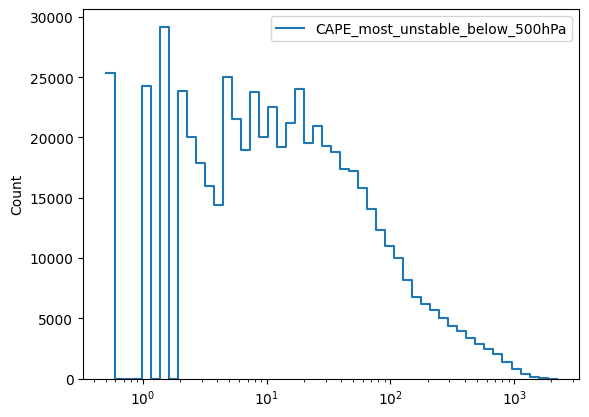

In [17]:
sns.histplot(df[df['CAPE_most_unstable_below_500hPa'] >= 0.5][['CAPE_most_unstable_below_500hPa']], element="step", bins=50, fill=False, log_scale=True)

count    9.097920e+05
mean     1.880678e-11
std      2.729895e-09
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.889444e-07
Name: lightning_flash_accumulation-PT01H, dtype: float64


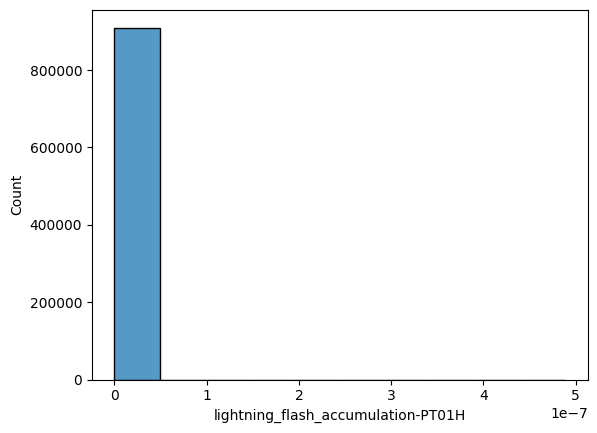

In [18]:
lightning_col = "lightning_flash_accumulation-PT01H"
sns.histplot(df[lightning_col], multiple="dodge", bins=10)
print(df[lightning_col].describe())


count    5.300000e+01
mean     3.228351e-07
std      1.554516e-07
min      4.656613e-09
25%      2.384186e-07
50%      4.163012e-07
75%      4.442409e-07
max      4.889444e-07
Name: lightning_flash_accumulation-PT01H, dtype: float64


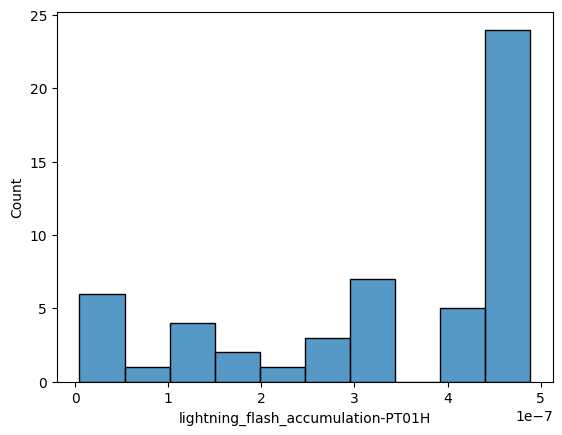

In [19]:
positive_lightning_data = df[df[lightning_col] > 0][lightning_col]
sns.histplot(positive_lightning_data, multiple="dodge", bins=10)
print(positive_lightning_data.describe())

# Occurrences of lightning flash is too small. Let's not include it in the training.

count    9.097920e+05
mean     7.240840e-07
std      9.347004e-06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      8.230209e-04
Name: hail_fall_accumulation-PT01H, dtype: float64


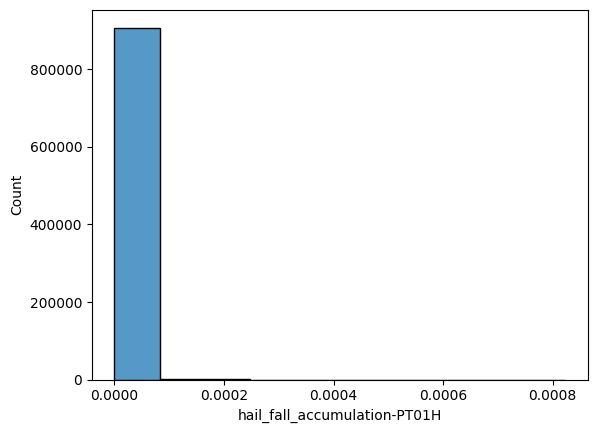

In [20]:
hail_col = "hail_fall_accumulation-PT01H"
sns.histplot(df[hail_col], multiple="dodge", bins=10)
print(df[hail_col].describe())

count    2.457400e+04
mean     2.680743e-05
std      5.035277e-05
min      9.536743e-07
25%      3.814697e-06
50%      8.583069e-06
75%      2.765655e-05
max      8.230209e-04
Name: hail_fall_accumulation-PT01H, dtype: float64


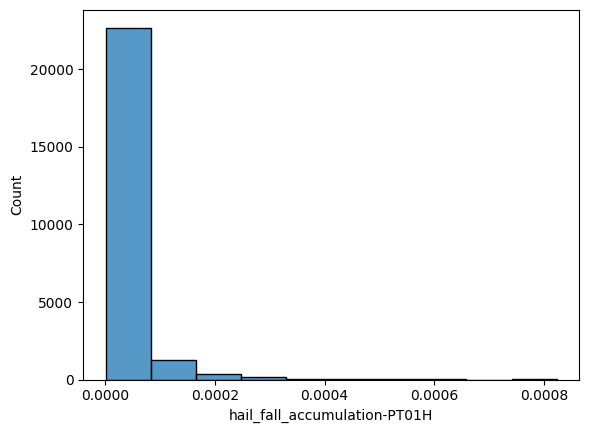

In [21]:
positive_hail = df[df[hail_col] * 1e+3 > 0][hail_col]
sns.histplot(positive_hail, multiple="dodge", bins=10)
print(positive_hail.describe())

# The amount of predicted hail fall is very small (and it should be a rare event), so it will be excluded from the training data.

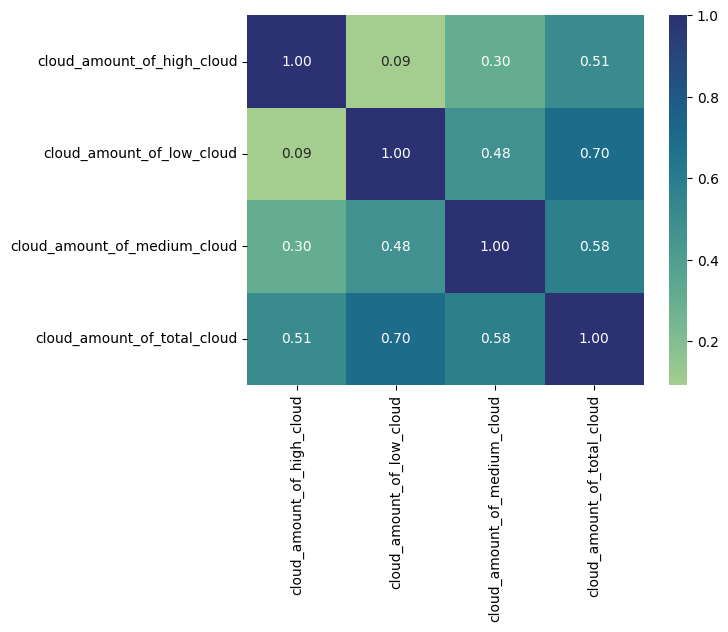

In [22]:
cloud_parameters = [
  # 'cloud_amount_below_1000ft_ASL',
  'cloud_amount_of_high_cloud',
  'cloud_amount_of_low_cloud',
  'cloud_amount_of_medium_cloud',
  'cloud_amount_of_total_cloud',
]
draw_heatmap(df[cloud_parameters])

# Cloud amount at different height do not correlate each other.
# cloud_amount_below_1000ft_ASL contains nan values so it should be excluded for simplicity.
# All the other parameters can be used as the input. 

<Axes: ylabel='Count'>

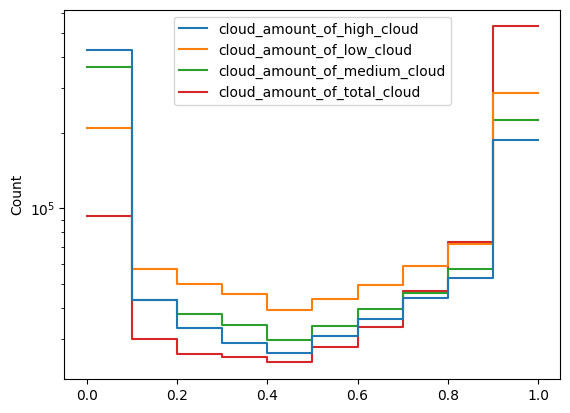

In [23]:
# sns.histplot(df[cloud_parameters], multiple="dodge", bins=10)
sns.histplot(df[cloud_parameters], element="step", bins=10, fill=False, log_scale=[False, True])


       temperature_at_screen_level  temperature_at_surface  \
count                909792.000000           909792.000000   
mean                      9.786181               10.041385   
std                       5.075627                5.725037   
min                     -12.106250              -16.325000   
25%                       6.198438                5.987500   
50%                       9.651563                9.487500   
75%                      13.643750               14.175000   
max                      27.432813               38.300000   

       temperature_at_screen_level_max-PT01H  \
count                          909792.000000   
mean                               10.027127   
std                                 5.093750   
min                               -11.817200   
25%                                 6.393750   
50%                                 9.839060   
75%                                13.885940   
max                                27.503120   

       t

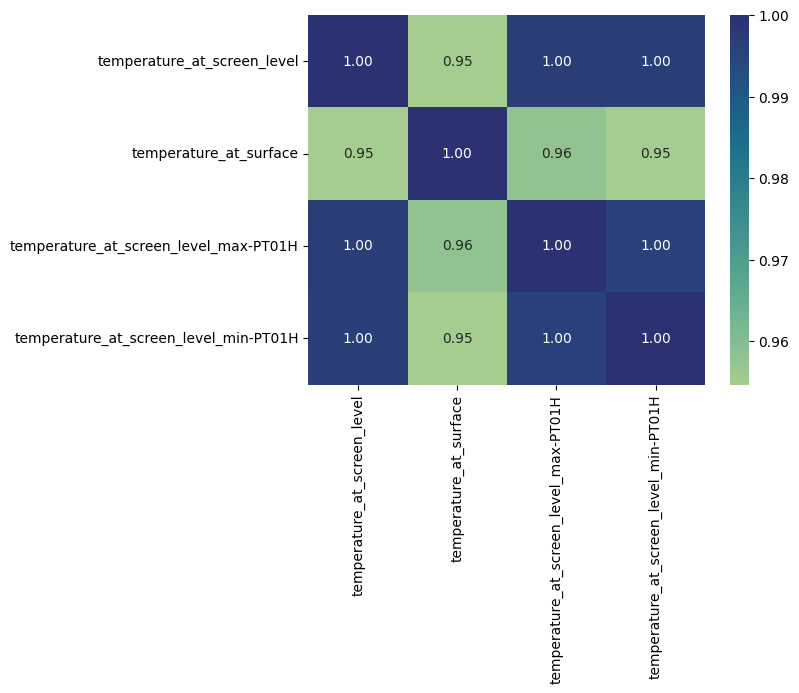

In [24]:
temp_parameters = [
  "temperature_at_screen_level",
  "temperature_at_surface",
  "temperature_at_screen_level_max-PT01H",
  "temperature_at_screen_level_min-PT01H",
]

# Convert K to C
data = df[temp_parameters] - 273.2
print(data.describe())
draw_heatmap(data)

# screen_level, screen_level_max and screen_level_min are 1.0 correlated each other. 
# screen_level can be the representative value.
# screen_level and at_surface temperature correlates 0.95. So, at_surface can also be dropped.

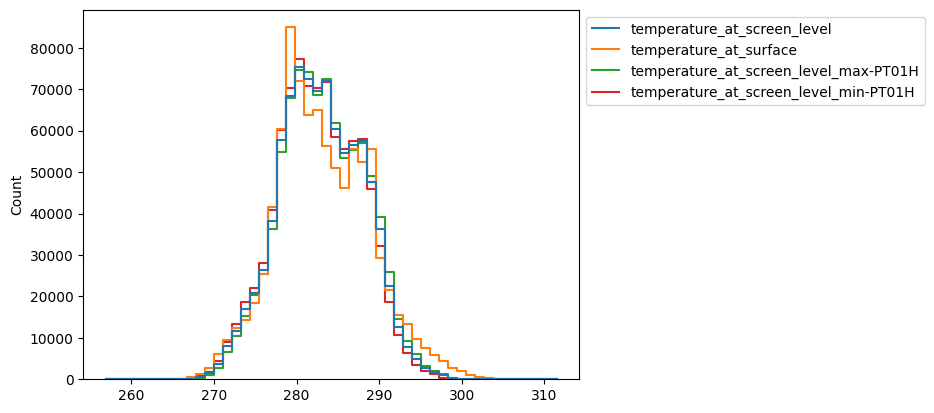

In [25]:
# sns.histplot(df[temp_parameters], multiple="dodge", bins=10)
ax = sns.histplot(df[temp_parameters], element="step", bins=50, fill=False)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

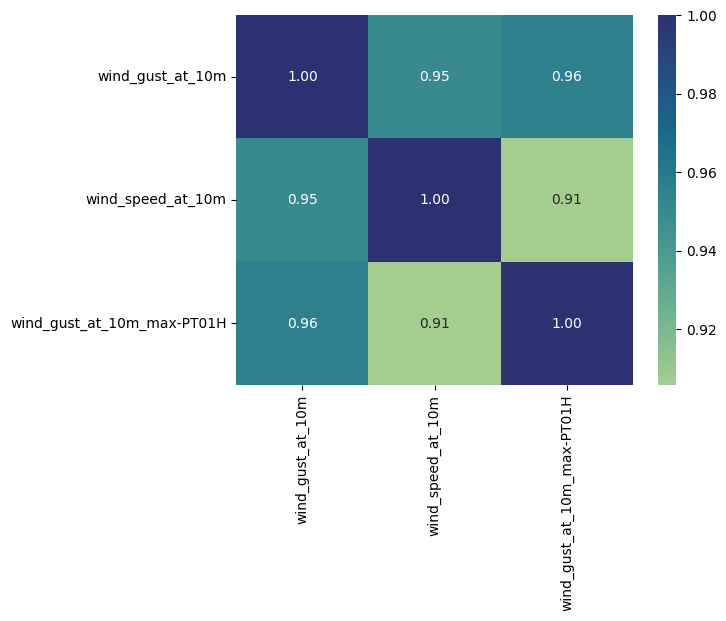

In [26]:
wind_parameters = [
  "wind_gust_at_10m",
  "wind_speed_at_10m",
  "wind_gust_at_10m_max-PT01H",
]
draw_heatmap(df[wind_parameters])

# wind_speed_at_10m can represent the three parameters.

<Axes: ylabel='Count'>

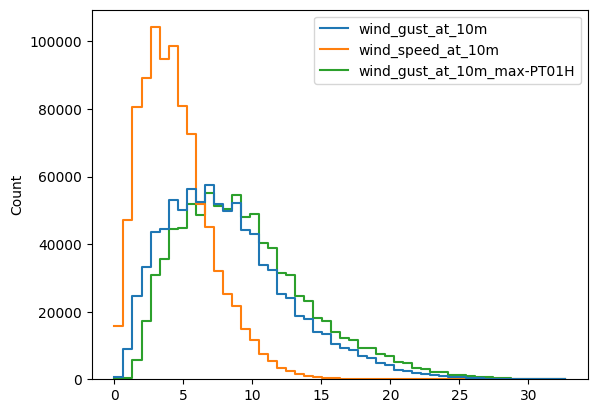

In [27]:
# sns.histplot(df[wind_parameters], multiple="dodge", bins=10)
sns.histplot(df[wind_parameters], element="step", bins=50, fill=False)

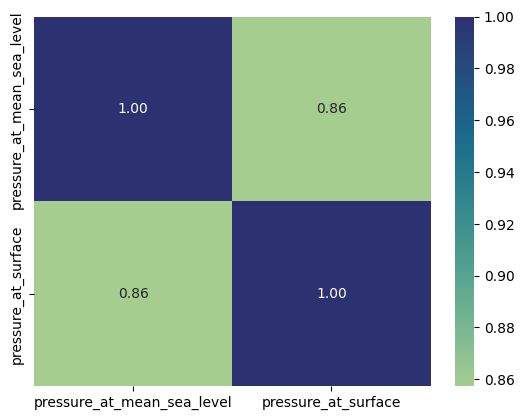

In [28]:
pressure_parameters = [
  "pressure_at_mean_sea_level",
  "pressure_at_surface",
]
draw_heatmap(df[pressure_parameters])

# pressure at surface and at MSL are different mainly because of the altitude.
# pressure at surface should be sufficient.

<Axes: ylabel='Count'>

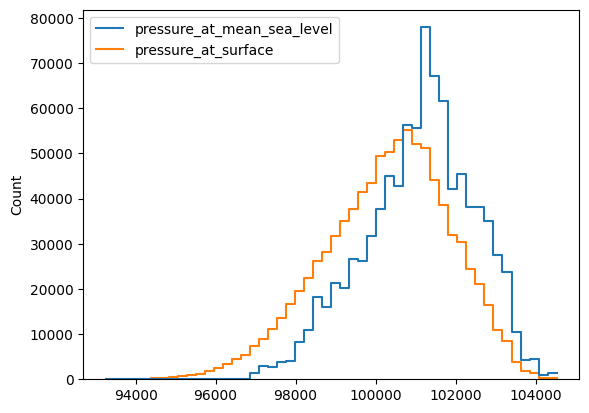

In [29]:
# sns.histplot(df[pressure_parameters], multiple="dodge", bins=10)
sns.histplot(df[pressure_parameters], element="step", bins=50, fill=False)

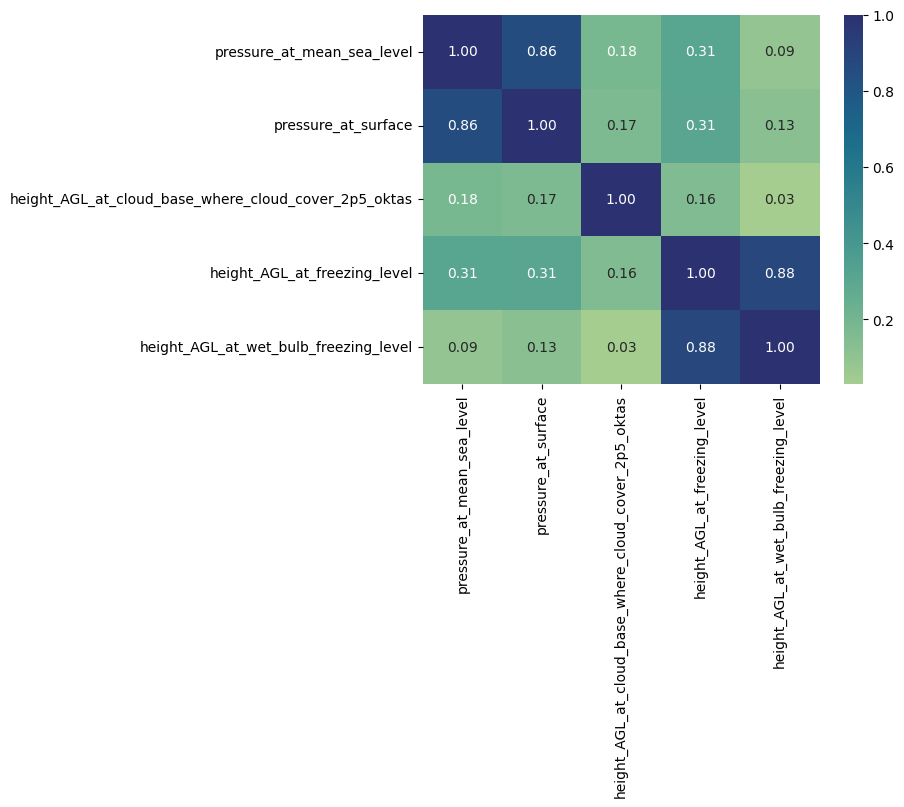

In [30]:
height_parameters = [
  "height_AGL_at_cloud_base_where_cloud_cover_2p5_oktas",
  "height_AGL_at_freezing_level",
  "height_AGL_at_wet_bulb_freezing_level",
]
draw_heatmap(df[pressure_parameters + height_parameters])

<Axes: ylabel='Count'>

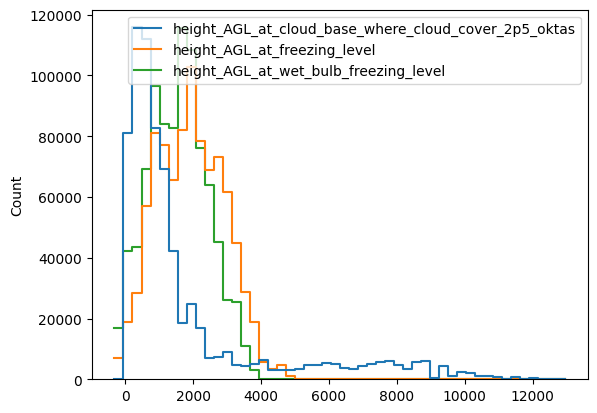

In [31]:
# sns.histplot(df[pressure_parameters], multiple="dodge", bins=10)
sns.histplot(df[height_parameters], element="step", bins=50, fill=False)

In [32]:
df

,date_time,y,x,CAPE_most_unstable_below_500hPa,CAPE_surface,cloud_amount_below_1000ft_ASL,cloud_amount_of_high_cloud,cloud_amount_of_low_cloud,cloud_amount_of_medium_cloud,cloud_amount_of_total_cloud,...,wind_gust_at_10m,wind_speed_at_10m,hail_fall_accumulation-PT01H,lightning_flash_accumulation-PT01H,precipitation_accumulation-PT01H,rainfall_accumulation-PT01H,snowfall_accumulation-PT01H,temperature_at_screen_level_max-PT01H,temperature_at_screen_level_min-PT01H,wind_gust_at_10m_max-PT01H
0,2023010100,0,0,3.5,2.0,0.718750,1.000000,1.000000,1.0,1.000000,...,10.8750,5.6875,0.0,0.0,0.000855,0.000855,0.0,275.59375,275.23438,10.9375
1,2023010100,0,1,2.5,2.0,0.734375,1.000000,1.000000,1.0,1.000000,...,10.8125,5.6875,0.0,0.0,0.000931,0.000931,0.0,275.61720,275.24220,10.6875
2,2023010100,0,2,2.0,2.0,0.757812,1.000000,1.000000,1.0,1.000000,...,10.5000,5.5000,0.0,0.0,0.001070,0.001070,0.0,275.58594,275.22656,10.3750
3,2023010100,0,3,2.0,2.0,0.828125,1.000000,1.000000,1.0,1.000000,...,10.5625,5.5000,0.0,0.0,0.001306,0.001306,0.0,275.33594,275.00780,10.5000
4,2023010100,0,4,1.0,1.0,NaN,1.000000,1.000000,1.0,1.000000,...,10.9375,5.8125,0.0,0.0,0.001493,0.001493,0.0,274.84375,274.53906,10.8750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909787,2023123123,7,8,0.0,0.0,0.015625,0.031250,0.796875,0.0,0.921875,...,6.0000,4.5625,0.0,0.0,0.000000,0.000000,0.0,278.77344,278.22656,6.0000
909788,2023123123,7,9,0.0,0.0,0.031250,0.015625,0.773438,0.0,0.859375,...,6.1250,4.6875,0.0,0.0,0.000000,0.000000,0.0,278.88280,278.28906,6.2500
909789,2023123123,7,10,0.0,0.0,0.046875,0.007812,0.781250,0.0,0.843750,...,6.1250,4.6875,0.0,0.0,0.000000,0.000000,0.0,278.99220,278.41406,6.2500
909790,2023123123,7,11,0.0,0.0,0.070312,0.000000,0.921875,0.0,0.960938,...,6.1250,4.6250,0.0,0.0,0.000000,0.000000,0.0,279.10938,278.71875,6.3125


/var/folders/hk/cnl8wdkj2jx634qcdjdtz1dc0000gn/T/ipykernel_73780/959109169.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df00_month['month'] = (df00_month['date_time'] // 10000) % 100


<Axes: xlabel='month'>

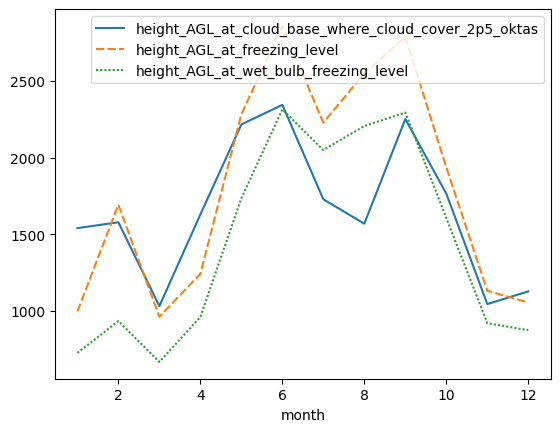

In [33]:
df00_month = df[(df['x'] == 0) & (df['y'] == 0)]
df00_month['month'] = (df00_month['date_time'] // 10000) % 100
df00_month = df00_month.groupby('month').mean()[height_parameters]
sns.lineplot(df00_month)
# df00_month

count    909792.000000
mean        279.622525
std           4.662139
min         259.343750
25%         276.421875
50%         279.890625
75%         282.921875
max         292.445312
Name: temperature_of_dew_point_at_screen_level, dtype: float64


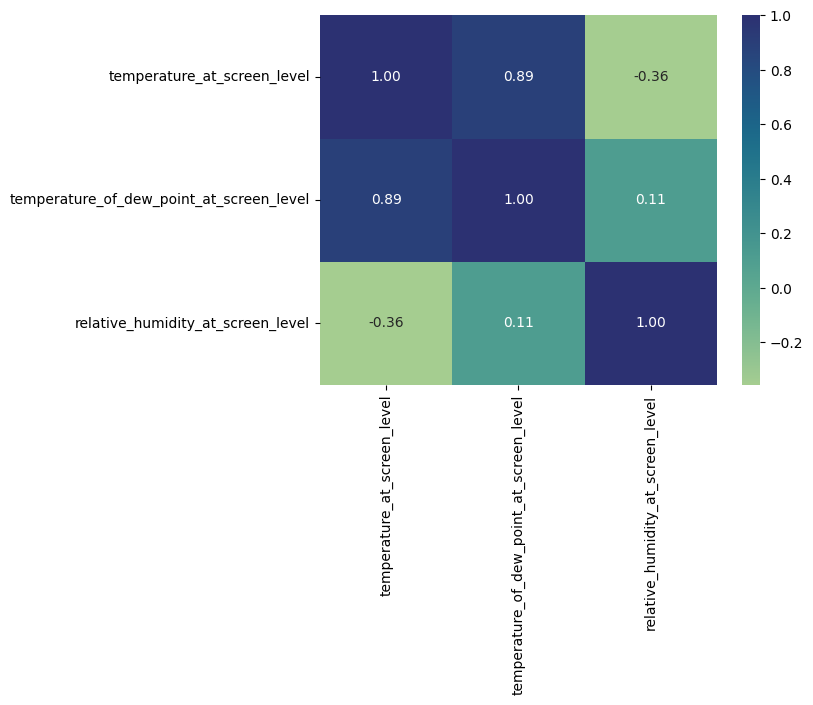

In [34]:
print(df["temperature_of_dew_point_at_screen_level"].describe())

humidity_params = [
  "temperature_at_screen_level",
  "temperature_of_dew_point_at_screen_level",
  "relative_humidity_at_screen_level",
]
draw_heatmap(df[humidity_params])

# Read Dew Point vs Humidity discussion in this web page.
# https://www.weather.gov/arx/why_dewpoint_vs_humidity#:~:text=The%20dew%20point%20is%20the,water%20in%20the%20gas%20form.
# Both dew point and RH indicate the air humidity.
# However, dew point temperature represents better how comfortable the air is.


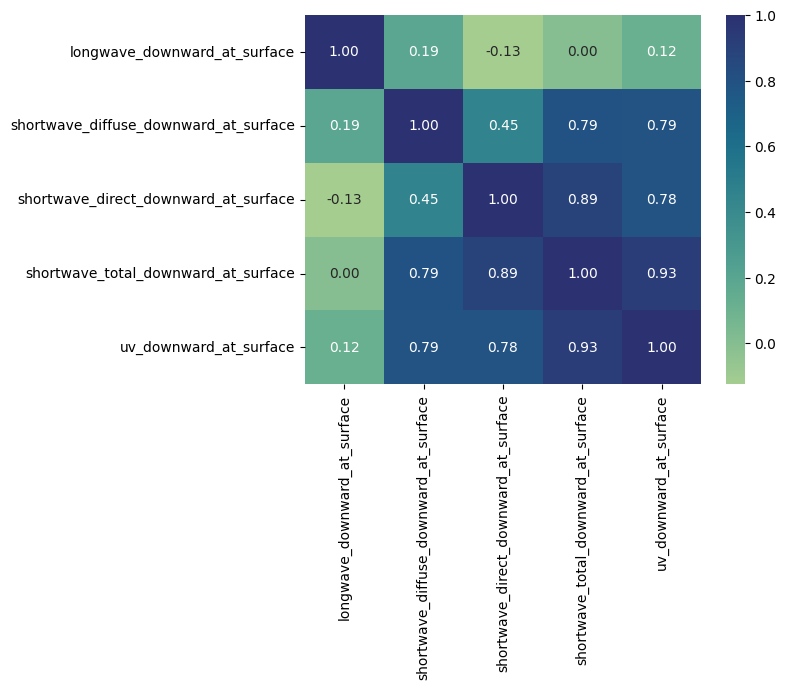

In [35]:
radiation_params = [
  "radiation_flux_in_longwave_downward_at_surface",
  "radiation_flux_in_shortwave_diffuse_downward_at_surface",
  "radiation_flux_in_shortwave_direct_downward_at_surface",
  "radiation_flux_in_shortwave_total_downward_at_surface",
  "radiation_flux_in_uv_downward_at_surface",  
]

radiation_data = df[radiation_params]
# Shorten the legend names
radiation_data.columns = [p.replace("radiation_flux_in_", "") for p in radiation_params]
draw_heatmap(radiation_data)

# radiation_flux_in_shortwave_total_downward_at_surface and radiation_flux_in_uv_downward_at_surface are correlated by 0.93.
# radiation_flux_in_shortwave_total_downward_at_surface and radiation_flux_in_shortwave_direct_downward_at_surface are correlated by 0.89.
# So, radiation_flux_in_shortwave_total_downward_at_surface can be used as the representative parameters among them.



<Axes: ylabel='Count'>

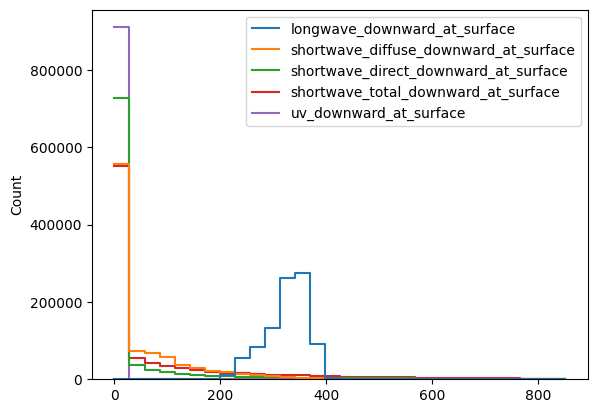

In [36]:
# sns.histplot(df[radiation_params], multiple="dodge", bins=10)


sns.histplot(radiation_data, element="step", bins=30, fill=False)
# One longwave and one shortwave parameter will be sufficient. 
# uv_download parameter is almost identical to the shortwave_total_downward radiation.

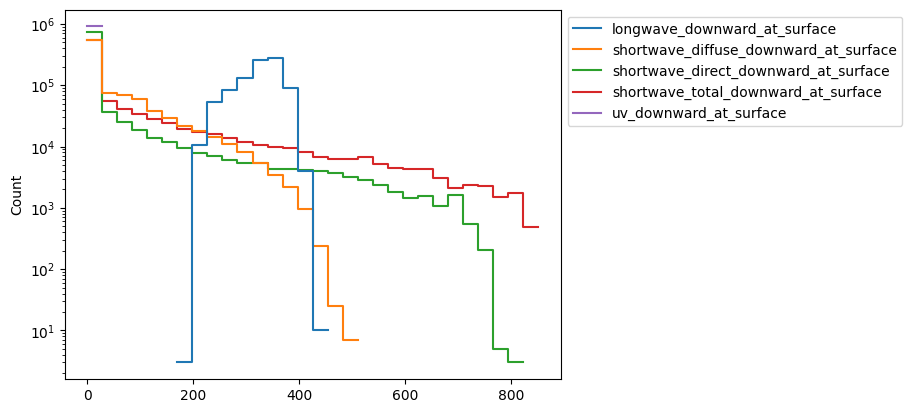

In [37]:
ax = sns.histplot(radiation_data, element="step", bins=30, fill=False, log_scale=[False, True])
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

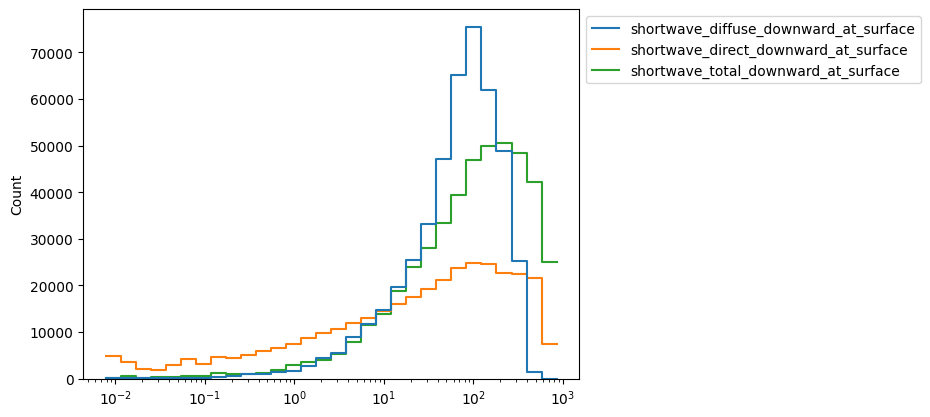

In [38]:
ax = sns.histplot(radiation_data[[
  'shortwave_diffuse_downward_at_surface',
  'shortwave_direct_downward_at_surface',
  'shortwave_total_downward_at_surface',
  ]], element="step", bins=30, fill=False, log_scale=True)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

<Axes: xlabel='uv_downward_at_surface', ylabel='Count'>

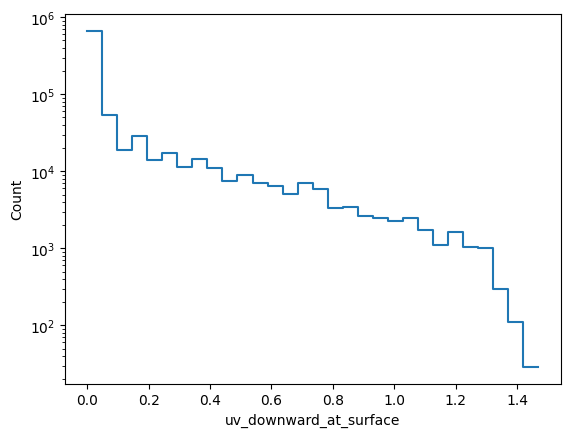

In [39]:
sns.histplot(radiation_data['uv_downward_at_surface'], element="step", bins=30, fill=False, log_scale=[False, True])


In [40]:
radiation_data['shortwave_direct_downward_at_surface'].describe()

count    909792.000000
mean         41.643393
std         110.264063
min           0.000000
25%           0.000000
50%           0.000000
75%          10.250000
max         810.843750
Name: shortwave_direct_downward_at_surface, dtype: float64

count    347018.000000
mean        109.178271
std         156.532022
min           0.007812
25%           3.835938
50%          35.023438
75%         148.687500
max         810.843750
Name: shortwave_direct_downward_at_surface, dtype: float64


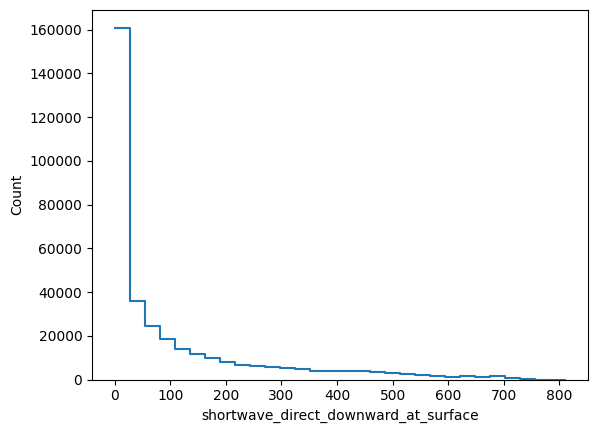

In [41]:
radiation_gt0 = radiation_data[radiation_data['shortwave_direct_downward_at_surface'] > 0]['shortwave_direct_downward_at_surface']
print(radiation_gt0.describe())
ax = sns.histplot(radiation_gt0, element="step", bins=30, fill=False)
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

<Axes: ylabel='month'>

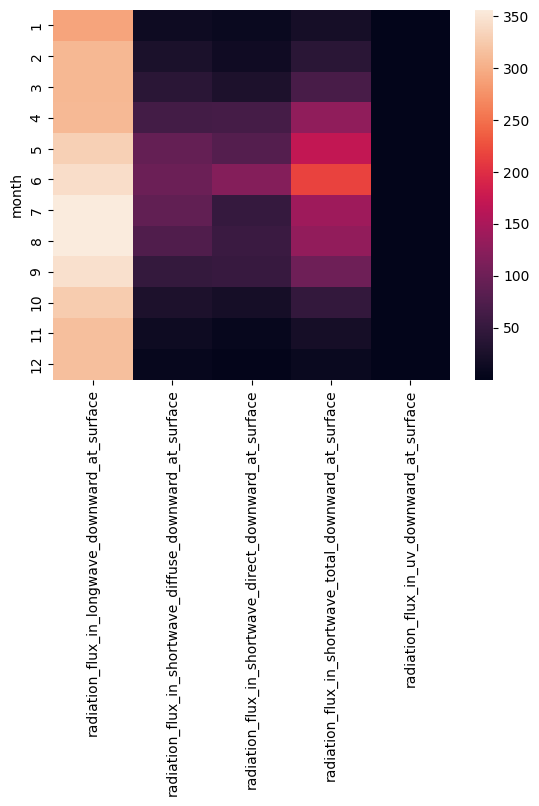

In [42]:
# Check the seasonal impact to the radiation parameters.

df_monthly = df.copy()
df_monthly['month'] = (df['date_time'] // 10000) % 100
df_monthly_radiation = df_monthly.groupby('month').mean()
df_monthly_radiation = df_monthly_radiation[radiation_params]
sns.heatmap(df_monthly_radiation)

<Axes: ylabel='hour'>

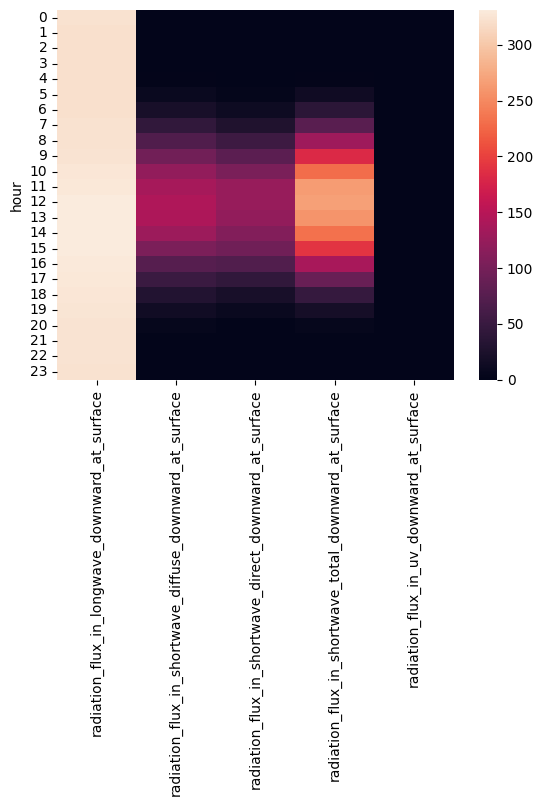

In [43]:
# Check the daily impact to the radiation parameters.

df_monthly = df.copy()
df_monthly['hour'] = df['date_time'] % 100
df_monthly_radiation = df_monthly.groupby('hour').mean()
df_monthly_radiation = df_monthly_radiation[radiation_params]
sns.heatmap(df_monthly_radiation)

In [44]:
df

,date_time,y,x,CAPE_most_unstable_below_500hPa,CAPE_surface,cloud_amount_below_1000ft_ASL,cloud_amount_of_high_cloud,cloud_amount_of_low_cloud,cloud_amount_of_medium_cloud,cloud_amount_of_total_cloud,...,wind_gust_at_10m,wind_speed_at_10m,hail_fall_accumulation-PT01H,lightning_flash_accumulation-PT01H,precipitation_accumulation-PT01H,rainfall_accumulation-PT01H,snowfall_accumulation-PT01H,temperature_at_screen_level_max-PT01H,temperature_at_screen_level_min-PT01H,wind_gust_at_10m_max-PT01H
0,2023010100,0,0,3.5,2.0,0.718750,1.000000,1.000000,1.0,1.000000,...,10.8750,5.6875,0.0,0.0,0.000855,0.000855,0.0,275.59375,275.23438,10.9375
1,2023010100,0,1,2.5,2.0,0.734375,1.000000,1.000000,1.0,1.000000,...,10.8125,5.6875,0.0,0.0,0.000931,0.000931,0.0,275.61720,275.24220,10.6875
2,2023010100,0,2,2.0,2.0,0.757812,1.000000,1.000000,1.0,1.000000,...,10.5000,5.5000,0.0,0.0,0.001070,0.001070,0.0,275.58594,275.22656,10.3750
3,2023010100,0,3,2.0,2.0,0.828125,1.000000,1.000000,1.0,1.000000,...,10.5625,5.5000,0.0,0.0,0.001306,0.001306,0.0,275.33594,275.00780,10.5000
4,2023010100,0,4,1.0,1.0,NaN,1.000000,1.000000,1.0,1.000000,...,10.9375,5.8125,0.0,0.0,0.001493,0.001493,0.0,274.84375,274.53906,10.8750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909787,2023123123,7,8,0.0,0.0,0.015625,0.031250,0.796875,0.0,0.921875,...,6.0000,4.5625,0.0,0.0,0.000000,0.000000,0.0,278.77344,278.22656,6.0000
909788,2023123123,7,9,0.0,0.0,0.031250,0.015625,0.773438,0.0,0.859375,...,6.1250,4.6875,0.0,0.0,0.000000,0.000000,0.0,278.88280,278.28906,6.2500
909789,2023123123,7,10,0.0,0.0,0.046875,0.007812,0.781250,0.0,0.843750,...,6.1250,4.6875,0.0,0.0,0.000000,0.000000,0.0,278.99220,278.41406,6.2500
909790,2023123123,7,11,0.0,0.0,0.070312,0.000000,0.921875,0.0,0.960938,...,6.1250,4.6250,0.0,0.0,0.000000,0.000000,0.0,279.10938,278.71875,6.3125


/var/folders/hk/cnl8wdkj2jx634qcdjdtz1dc0000gn/T/ipykernel_73780/131402795.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['hour'] = df['date_time'] % 100


The number of parameters to be used = 20
The number of input parameters to the VAE will be 2080 for hourly data.


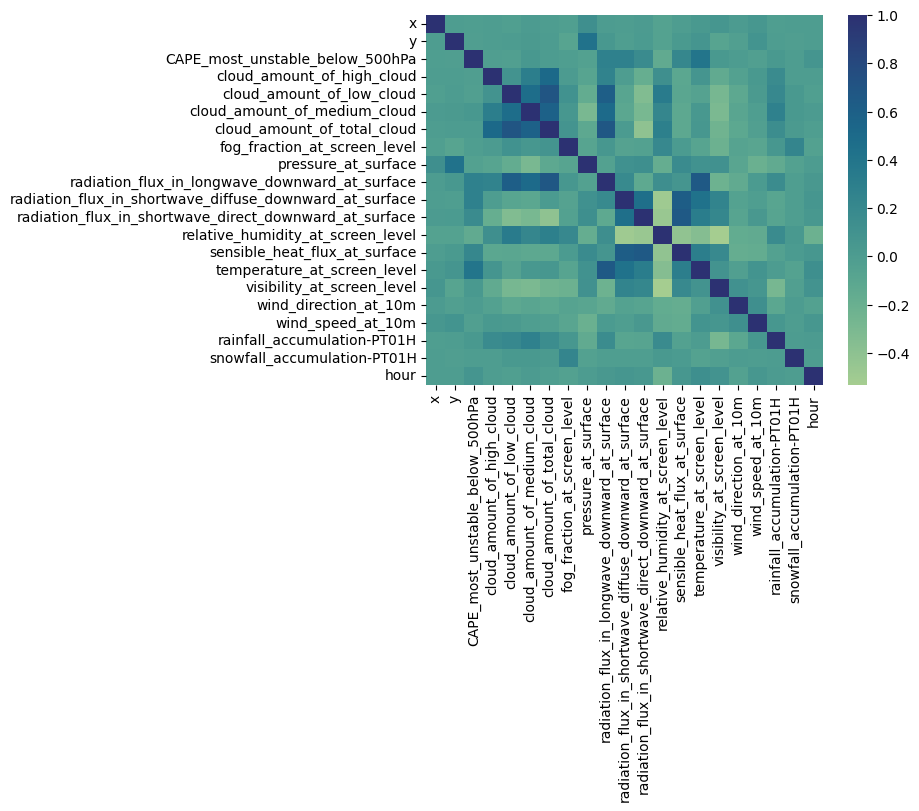

In [ ]:
# Show the heatmap of all the selected parameters.

selected_params = [
  'x',
  'y',
  "CAPE_most_unstable_below_500hPa",
  "cloud_amount_of_high_cloud",
  "cloud_amount_of_low_cloud",
  "cloud_amount_of_medium_cloud",
  "cloud_amount_of_total_cloud",
  "fog_fraction_at_screen_level",
  "pressure_at_surface",
  "radiation_flux_in_longwave_downward_at_surface",
  "radiation_flux_in_shortwave_diffuse_downward_at_surface",
  "radiation_flux_in_shortwave_direct_downward_at_surface",
  "relative_humidity_at_screen_level",
  "sensible_heat_flux_at_surface",
  "temperature_at_screen_level",
  "visibility_at_screen_level",
  "wind_direction_at_10m",
  "wind_speed_at_10m",
  "rainfall_accumulation-PT01H",
  "snowfall_accumulation-PT01H",
]

data = df[selected_params]
data['hour'] = df['date_time'] % 100
draw_heatmap(data, annot=False)

print(f"The number of parameters to be used = {len(selected_params)}")
print(f"The number of input parameters to the VAE will be {len(selected_params) * width * height} for hourly data.")

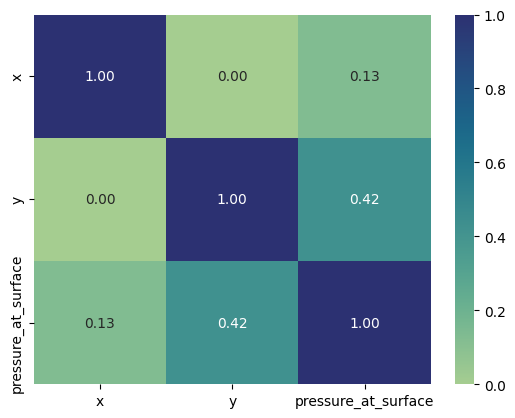

In [46]:
draw_heatmap(data[['x', 'y', 'pressure_at_surface']])

# The pressure_at_surface has moderate correlation with y and xy.


<Axes: xlabel='pressure_at_surface', ylabel='y'>

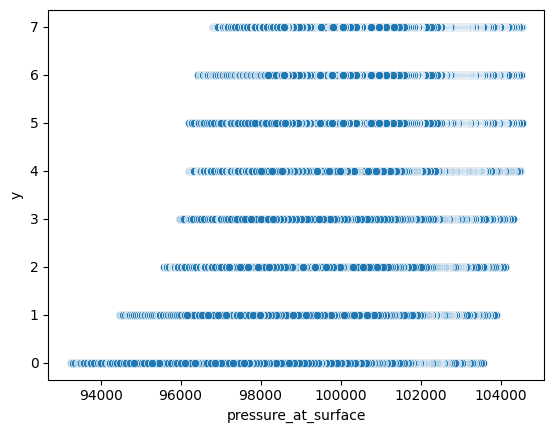

In [47]:
sns.scatterplot(df, x='pressure_at_surface', y='y')

Text(0.5, 1.0, 'Land-sea mask')

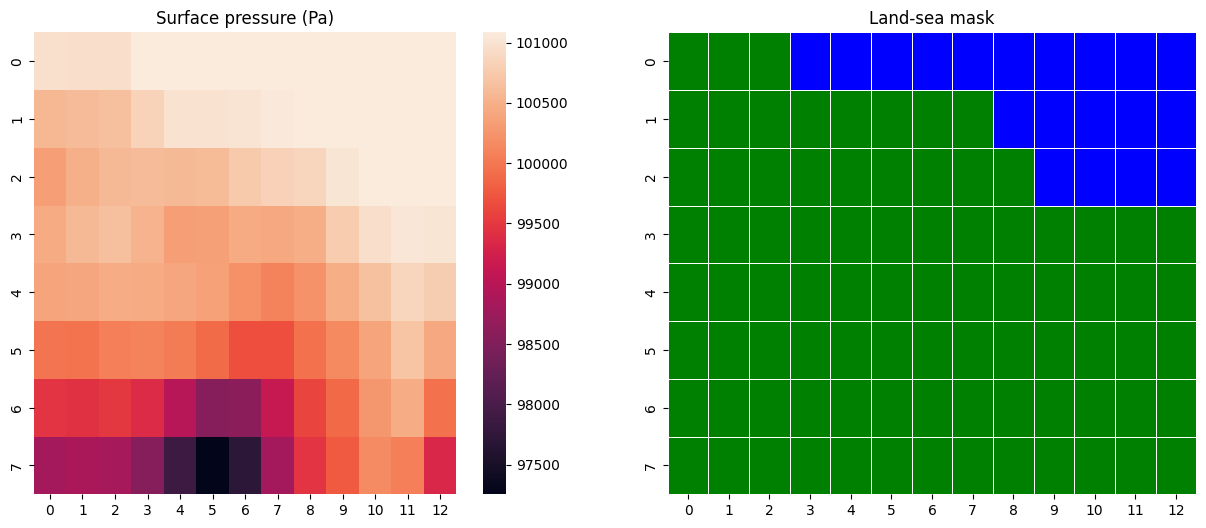

In [48]:
# Visualise the geographical dependency of the air pressure.

plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)

pressure_df = df[['x', 'y', 'pressure_at_surface']].groupby(['x', 'y'], as_index=False).mean().sort_values(['y', 'x']).reset_index()
pressure_matrix = np.flipud(pressure_df['pressure_at_surface'].to_numpy().reshape(8, 13))
sns.heatmap(pressure_matrix)
plt.title("Surface pressure (Pa)")

plt.subplot(1,2,2)
land_sea_mask_df = df[['x', 'y', 'landsea_mask']].groupby(['x', 'y'], as_index=False).mean().sort_values(['y', 'x']).reset_index()
land_sea_mask_matrix = np.flipud(land_sea_mask_df['landsea_mask'].to_numpy().reshape(8, 13))
sns.heatmap(land_sea_mask_matrix, linewidths=0.5, cmap=["blue", "green"], cbar=False)
plt.title("Land-sea mask")



In [49]:
col_name = 'rainfall_accumulation-PT01H'
# Convert the fainfall into mm.
df_rain = df[['date_time', 'y', 'x', col_name]]
df_rain[col_name] = df_rain[col_name] * 1e+3
# df_rain[df_rain[col_name] > 1][['date_time', 'y', 'x', col_name]]
df_rain_gt1 = df_rain[df_rain[col_name] >= 1]

df_rain_gt1[col_name].describe()

/var/folders/hk/cnl8wdkj2jx634qcdjdtz1dc0000gn/T/ipykernel_73780/1871686685.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rain[col_name] = df_rain[col_name] * 1e+3


count    29381.000000
mean         2.078200
std          1.145282
min          1.000404
25%          1.295090
50%          1.728058
75%          2.449989
max         17.476082
Name: rainfall_accumulation-PT01H, dtype: float64

In [50]:
df_rain[(df_rain['x'] == 0) & (df_rain['y'] == 0)][col_name].describe()

count    8748.000000
mean        0.118372
std         0.484557
min         0.000000
25%         0.000000
50%         0.000000
75%         0.003815
max        10.741234
Name: rainfall_accumulation-PT01H, dtype: float64

<Axes: xlabel='rainfall_accumulation-PT01H', ylabel='Count'>

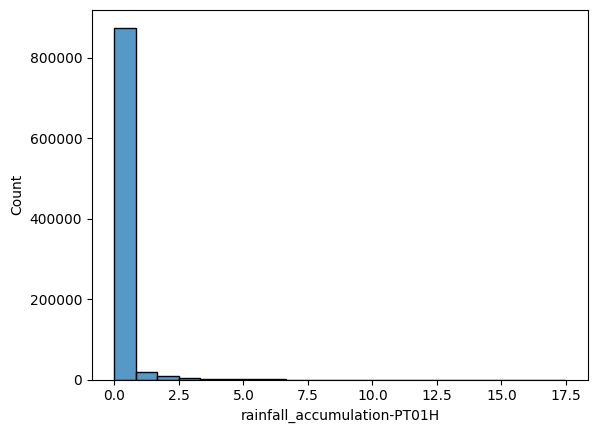

In [51]:
sns.histplot(df_rain[col_name])

In [52]:
df_rain.describe()

,date_time,y,x,rainfall_accumulation-PT01H
count,9.097920e+05,909792.000000,909792.000000,909792.000000
mean,2.023067e+09,3.500000,6.000000,0.100503
std,3.449152e+04,2.291289,3.741659,0.434245
min,2.023010e+09,0.000000,0.000000,0.000000
25%,2.023040e+09,1.750000,3.000000,0.000000
50%,2.023070e+09,3.500000,6.000000,0.000000
75%,2.023100e+09,5.250000,9.000000,0.000000
max,2.023123e+09,7.000000,12.000000,17.476082


In [53]:
len(df_rain[df_rain['rainfall_accumulation-PT01H'] * 1e+3 < 0.1]) / len(df_rain)

0.7883241444198235

<Axes: xlabel='rainfall_accumulation-PT01H', ylabel='Count'>

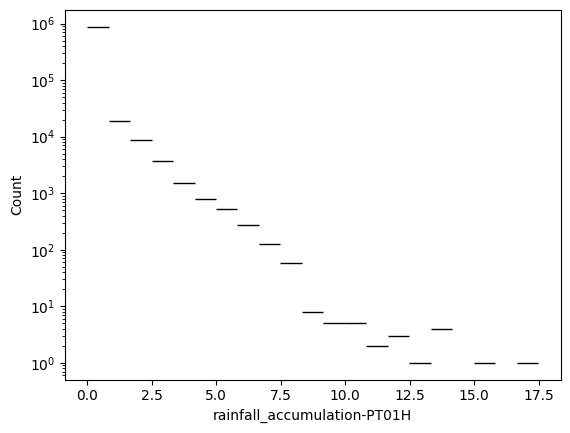

In [54]:
sns.histplot(df_rain[col_name], log_scale=[False, True])

<Axes: xlabel='rainfall_accumulation-PT01H', ylabel='Count'>

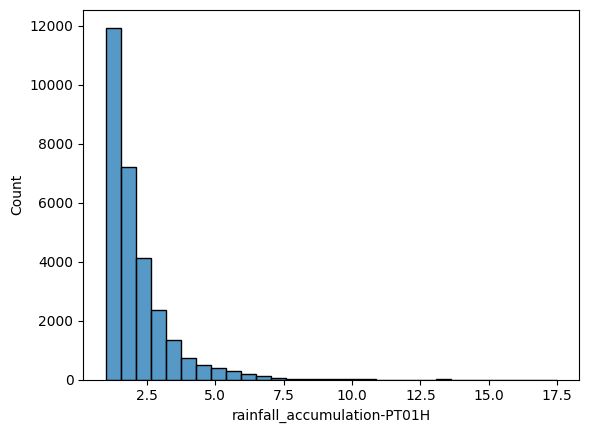

In [55]:
sns.histplot(df_rain_gt1[col_name], bins=30)

<Axes: xlabel='rainfall_accumulation-PT01H', ylabel='Count'>

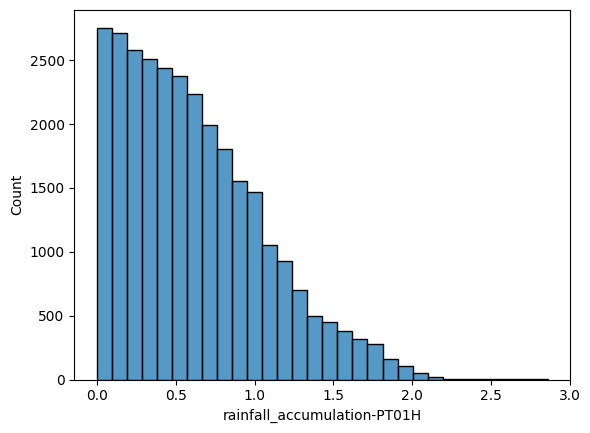

In [56]:
# Check if the log transformation can be applied to the rainfall data.
# It seems to work if it is applied to 1mm or greater rainfalls.

transformed_rain = np.log(df_rain_gt1[col_name] + 1e-6)
sns.histplot(transformed_rain, bins=30)

In [57]:
col_name = 'snowfall_accumulation-PT01H'
# Convert the snowfall into mm.
df_snow = df[['date_time', 'y', 'x', col_name]]
df_snow[col_name] = df_snow[col_name] * 1e+3
# df_snow[df_snow[col_name] > 1][['date_time', 'y', 'x', col_name]]
df_snow = df_snow[df_snow[col_name] >= 1]

df_snow[col_name].describe()

/var/folders/hk/cnl8wdkj2jx634qcdjdtz1dc0000gn/T/ipykernel_73780/792263231.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_snow[col_name] = df_snow[col_name] * 1e+3


count    214.000000
mean       1.428488
std        0.321558
min        1.007080
25%        1.156330
50%        1.371860
75%        1.623630
max        2.371788
Name: snowfall_accumulation-PT01H, dtype: float64

<Axes: xlabel='snowfall_accumulation-PT01H', ylabel='Count'>

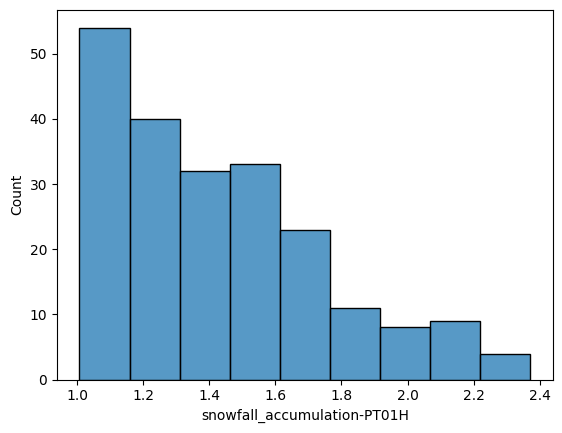

In [58]:
sns.histplot(df_snow[col_name])

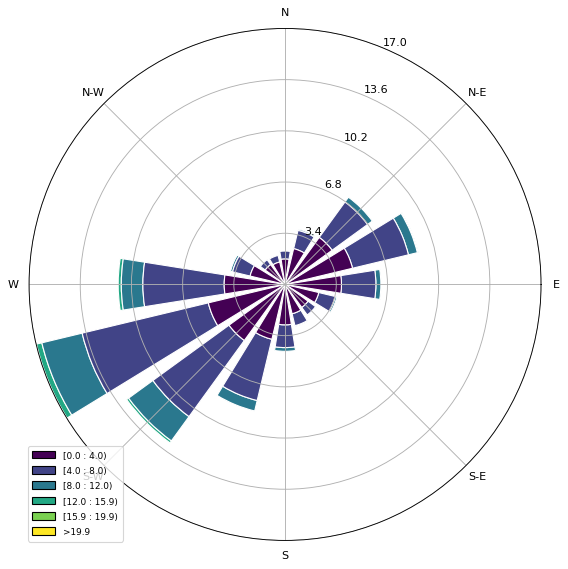

In [59]:
from windrose import WindroseAxes

wd = df["wind_direction_at_10m"]
ws = df["wind_speed_at_10m"]

ax = WindroseAxes.from_ax()
ax.bar(wd, ws, normed=True, opening=0.8, edgecolor="white")
ax.set_legend()

<Axes: >

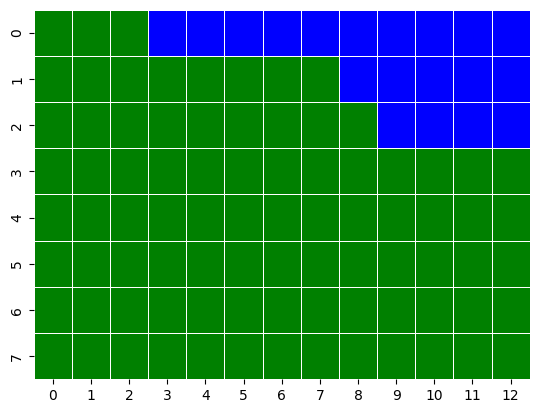

In [60]:
# Display the landsea mask. Blue is sea, green is land.

landsea_mask = df[['y', 'x', 'landsea_mask']]
grouped = landsea_mask.groupby(['y', 'x']).mean()
grids = np.flipud(grouped['landsea_mask'].values.reshape(height, width))
sns.heatmap(grids, linewidths=0.5, cmap=["blue", "green"], cbar=False)

<Axes: xlabel='fog_fraction_at_screen_level', ylabel='Count'>

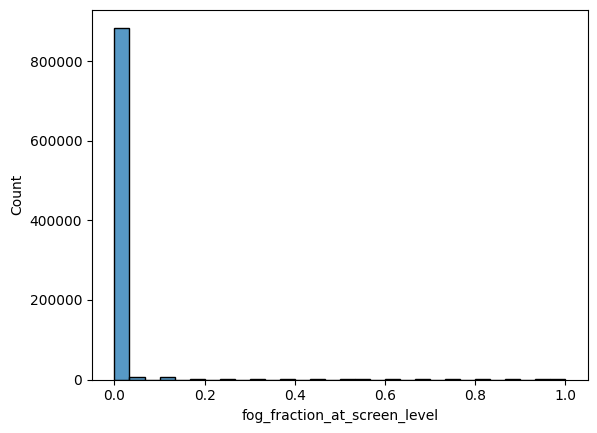

In [61]:
# Probability of fog presence in the grid cell, with 0.1 precision.
sns.histplot(df['fog_fraction_at_screen_level'], bins=30)

In [62]:
df6h['log_rain'] = np.log(df6h['rainfall_accumulation-PT01H'] + 1e-12)


<Axes: xlabel='log_rain', ylabel='Count'>

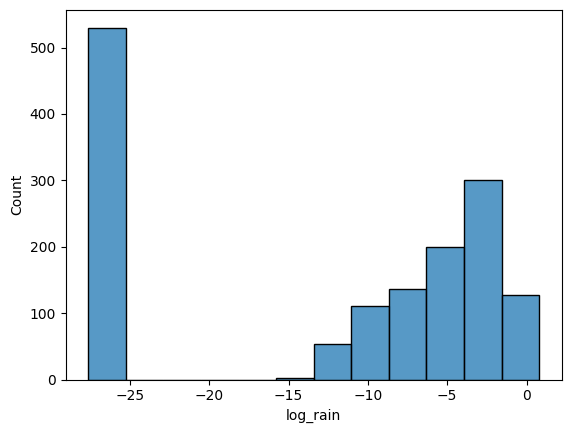

In [63]:
sns.histplot(df6h['log_rain'])

<Axes: xlabel='log_rain', ylabel='Count'>

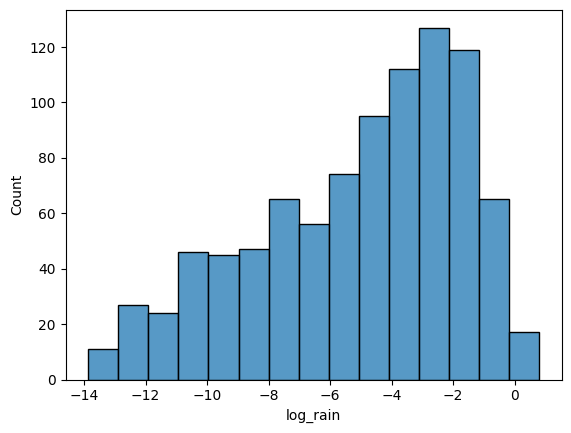

In [64]:
sns.histplot(df6h[df6h['log_rain'] > -20]['log_rain'])

In [65]:
df['log_rain'] = np.log(df['rainfall_accumulation-PT01H'] + 1e-12)

<Axes: xlabel='log_rain', ylabel='Count'>

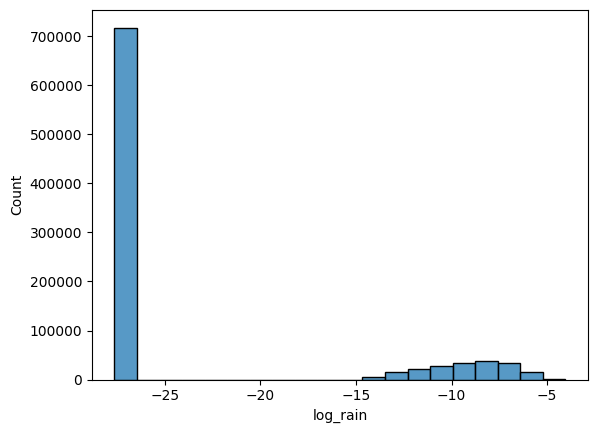

In [66]:
sns.histplot(df['log_rain'], bins=20)

<Axes: xlabel='log_rain', ylabel='Count'>

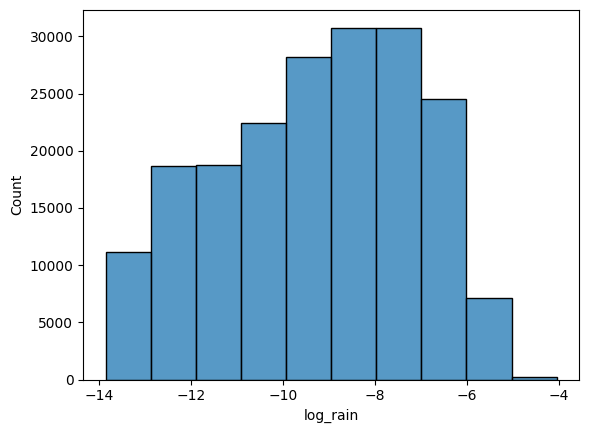

In [67]:
sns.histplot(df[df['log_rain'] > -20]['log_rain'], bins=10)

In [68]:
df6h['rain_p'] = df6h['rainfall_accumulation-PT01H'] * 1e+3 > 0.1
df6h

,day,6h,date_time,y,x,CAPE_most_unstable_below_500hPa,CAPE_surface,cloud_amount_below_1000ft_ASL,cloud_amount_of_high_cloud,cloud_amount_of_low_cloud,...,hail_fall_accumulation-PT01H,lightning_flash_accumulation-PT01H,precipitation_accumulation-PT01H,rainfall_accumulation-PT01H,snowfall_accumulation-PT01H,temperature_at_screen_level_max-PT01H,temperature_at_screen_level_min-PT01H,wind_gust_at_10m_max-PT01H,log_rain,rain_p
0,20230101,0,1262358303960,2184,3744,3247.5,2198.5,234.890625,616.460938,623.992188,...,0.002029,0.0,0.649246,0.647215,0.0,172987.92191,172817.26569,5546.9375,-0.435077,True
1,20230101,1,1262358307704,2184,3744,2361.5,221.0,153.281250,170.625000,612.304688,...,0.000021,0.0,0.008469,0.008446,0.0,173089.54672,172939.42953,2550.6875,-4.774093,True
2,20230101,2,1262358311448,2184,3744,761.0,371.0,29.554688,265.679688,320.500000,...,0.000000,0.0,0.000094,0.000094,0.0,172909.01543,172628.78884,3845.0625,-9.267824,False
3,20230101,3,1262358315192,2184,3744,729.5,53.0,0.687500,293.914062,11.570312,...,0.000000,0.0,0.000000,0.000000,0.0,172338.77345,172039.61715,3492.7500,-27.631021,False
4,20230102,0,1262358366360,2184,3744,3818.0,191.0,16.367188,0.000000,74.921875,...,0.003009,0.0,0.003009,0.000000,0.0,171245.29653,170960.64827,4348.3750,-27.631021,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,20231230,3,1262428764792,2184,3744,483.5,0.0,6.335938,582.648438,494.445312,...,0.000913,0.0,0.046376,0.045459,0.0,173858.71822,173512.94547,4151.8125,-3.090949,True
1456,20231231,0,1262428815960,2184,3744,315.5,0.0,0.312500,623.187500,118.773438,...,0.000000,0.0,0.000000,0.000000,0.0,173715.46910,173456.46105,5007.8125,-27.631021,False
1457,20231231,1,1262428819704,2184,3744,199.0,1.5,0.015625,68.593750,28.539062,...,0.000000,0.0,0.000000,0.000000,0.0,173286.64064,172872.85127,4957.0625,-27.631021,False
1458,20231231,2,1262428823448,2184,3744,521.5,1.0,1.312500,33.351562,382.851562,...,0.000000,0.0,0.000000,0.000000,0.0,173815.28942,173479.06241,2703.5000,-27.631021,False


In [69]:
df6h.loc[~df6h['rain_p'], 'rainfall_accumulation-PT01H'] = np.nan
df6h

,day,6h,date_time,y,x,CAPE_most_unstable_below_500hPa,CAPE_surface,cloud_amount_below_1000ft_ASL,cloud_amount_of_high_cloud,cloud_amount_of_low_cloud,...,hail_fall_accumulation-PT01H,lightning_flash_accumulation-PT01H,precipitation_accumulation-PT01H,rainfall_accumulation-PT01H,snowfall_accumulation-PT01H,temperature_at_screen_level_max-PT01H,temperature_at_screen_level_min-PT01H,wind_gust_at_10m_max-PT01H,log_rain,rain_p
0,20230101,0,1262358303960,2184,3744,3247.5,2198.5,234.890625,616.460938,623.992188,...,0.002029,0.0,0.649246,0.647215,0.0,172987.92191,172817.26569,5546.9375,-0.435077,True
1,20230101,1,1262358307704,2184,3744,2361.5,221.0,153.281250,170.625000,612.304688,...,0.000021,0.0,0.008469,0.008446,0.0,173089.54672,172939.42953,2550.6875,-4.774093,True
2,20230101,2,1262358311448,2184,3744,761.0,371.0,29.554688,265.679688,320.500000,...,0.000000,0.0,0.000094,NaN,0.0,172909.01543,172628.78884,3845.0625,-9.267824,False
3,20230101,3,1262358315192,2184,3744,729.5,53.0,0.687500,293.914062,11.570312,...,0.000000,0.0,0.000000,NaN,0.0,172338.77345,172039.61715,3492.7500,-27.631021,False
4,20230102,0,1262358366360,2184,3744,3818.0,191.0,16.367188,0.000000,74.921875,...,0.003009,0.0,0.003009,NaN,0.0,171245.29653,170960.64827,4348.3750,-27.631021,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,20231230,3,1262428764792,2184,3744,483.5,0.0,6.335938,582.648438,494.445312,...,0.000913,0.0,0.046376,0.045459,0.0,173858.71822,173512.94547,4151.8125,-3.090949,True
1456,20231231,0,1262428815960,2184,3744,315.5,0.0,0.312500,623.187500,118.773438,...,0.000000,0.0,0.000000,NaN,0.0,173715.46910,173456.46105,5007.8125,-27.631021,False
1457,20231231,1,1262428819704,2184,3744,199.0,1.5,0.015625,68.593750,28.539062,...,0.000000,0.0,0.000000,NaN,0.0,173286.64064,172872.85127,4957.0625,-27.631021,False
1458,20231231,2,1262428823448,2184,3744,521.5,1.0,1.312500,33.351562,382.851562,...,0.000000,0.0,0.000000,NaN,0.0,173815.28942,173479.06241,2703.5000,-27.631021,False
